In [69]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time
start_time = time.time()

In [70]:
global num_machines
global num_jobs
global proc_times

In [71]:
def problem_import(index):
    # Given matrix as a string
    data_set = {}
    data_set[0] = """
     54 83 15 71 77 36 53 38 27 87 76 91 14 29 12 77 32 87 68 94
     79  3 11 99 56 70 99 60  5 56  3 61 73 75 47 14 21 86  5 77
     16 89 49 15 89 45 60 23 57 64  7  1 63 41 63 47 26 75 77 40
     66 58 31 68 78 91 13 59 49 85 85  9 39 41 56 40 54 77 51 31
     58 56 20 85 53 35 53 41 69 13 86 72  8 49 47 87 58 18 68 28
    """
    data_set[1] = """
         74 21 58  4 21 28 58 83 31 61 94 44 97 94 66  6 37 22 99 83
 28  3 27 61 34 76 64 87 54 98 76 41 70 43 42 79 88 15 49 72
 89 52 56 13  7 32 32 98 46 60 23 87  7 36 26 85  7 34 36 48
 60 88 26 58 76 98 29 47 79 26 19 48 95 78 77 90 24 10 85 55
 54 66 12 57 70 82 99 84 16 41 23 11 68 58 30  5  5 39 58 31
 92 11 54 97 57 53 65 77 51 36 53 19 54 86 40 56 79 74 24  3
  9  8 88 72 27 22 50  2 49 82 93 96 43 13 60 11 37 91 84 67
  4 18 25 28 95 51 84 18  6 90 69 61 57  5 75  4 38 28  4 80
 25 15 91 49 56 10 62 70 76 99 58 83 84 64 74 14 18 48 96 86
 15 84  8 30 95 79  9 91 76 26 42 66 70 91 67  3 98  4 71 62
    """
    data_set[2] = """36 21 87 18 33 68 24 30 44 57 93 53 76  8 10 34  1  6 19 85 47 49 59 15 44 56 20 82  4 65 15 24 52 28 80 75 45 79 33 55 97 38 83 33 37 76 93 50 27 24 84 70 14 45  4 23 66 71  7 80 26  3 29 76 85 87 80 33 29 85 33 22 20 66 91 26 68 38 52 80 74 53 37 96 87  2 35 11 85  4 15 78 83 47 80 70 41 68  8 25 79 17 20 18 76 11 37 50 20 53 77  3 69 70 92 23 29 75 53 63 47  1 67 43 86 20 96 19 57 45 73 86 37 99  9 98 69 23 61  9 72 76 71  9 11 20 53 17 30 62 53 43  2 87 51  4 23 12 51 96 31 80 35 83 38 48  4 84 20 80 92 23 79  1 67 64 99 70 46 42 15  3 10 19 14 52 95 29 16  4 78 28 48 81 88 77  5 67 98 51 37 57 73 26 76 91 42 24 79 82 81 99 89  5  2  2 42 67 75 63 96 83 63 52  9 83 24 36 67 32  4 94 21 33 72 33 67 73 24 37 59  8 17 47 63 28 98  4 57  8 78 94 82 72 16 35 39 59 45 83 41 60 52 59 99 11 71  4 85  2 96 97 34 67 19 95 58 48 69  5 72 42 55 45 89 23 54  7 67 40 73 34 19 80  7 11 69 42 75 24 79 52 51 12 53  8 16 21 62 99 31 22 30 67 24 43 56 70 22 97 19 33 34  4  4 87 29 46 19 92 56 13 28 64 66 14 66 48 78 88 54 63 94 17 39 35  6 98 96 66 72 76 91 85 64 27  6 22 31 69 16 30 94 20 84 95 92 31 47 93 81 82 67 41 88 72 70  7 35 35 12 25 43 77 45 27 80 67 12 63 94  5 41 24 68 90 97 66 15 19 55 91 99 12 73 52 24 46 65 48 19 35 19 67 99 99 11 50 34 66 74 64  8 18 77 92 85 43 63 70 13 18 28 77 94 47 77  4 12 17 84 72 69 45 51 33 14 99 49 36 97 35 80 94 38 25 80 18 90 63 55 44 93 48 68 53 15 79  4 95 95 19 58 58  9 31 37 26 54 69 15 75 81 66 21 27 87 19 33 64 20 70 26 68  5 10 49 38 25 90
  4 19  7 29 71 79 20 84 59 30 43 33 76 33 90 42 94 61 76 87 71  5 82 92 51  3 12 21 58 66 63 46 71 79 84 56 84 72 35 48 93 56 20 19 64 30 11 41 38 93 86 58 63 99 28 45 15 28 44 70  8 67 67 75 75 50 33 51 32 87 99 67 66 32 76 34 89  9  7 86 26 80 44 53 38 32 81 46  1 53 26 83 24 35 82  2 63 44 45 26  3 66 63 37 47 23 98  2  7 48 49 27 36 10 17 22 75 71 19 33 68 82  4 37 62 89 62  7 14 26 69 80 94  2 66 34 81 74 68 31 91 90 10 61  7 72 35 41 78 19 24 45  8 39  5 20 79  8 46 10 83 56 75 26 76 35 63 62 14 49 16  9 49 85 61 27 98 36 32 83 34 13 39 17 81 84 46 50 63 81 44 56 44 81 96  8 51 64 45 41 34 79 83 16 58 13 56 55 14 65 79 91 62 55 59 21  1 11 51 84 51 18 71 43 37 68 37 39 43 31 63 71 68 86 65 82 78 74 93  7 33  3  1 34 54  8 87 25 83 57 59  3 46 24 99  3 45 12 89 88 19 77 41 52 93 90 47 50  2 24 50 80 94 40 38 35 46 34 10 74  5 56 52 69  3 40 26 29 24 81 37 93 46 15 12 74 74 29 50 86 12 50 70 50 47 72 96 46  9 13 85 20 59 94 31 80 80 77 80 90  7 23 59 57 26 64 37  2 94 51 39 57 42 42 48 42 84 48 33  2 10 37 47 26 46 38 21 57 51 27 72 99 81 29 94 48 86 94 87 50 22 33 63 51 53 12 82 54  7 71 95 74 67 30 57 36  5 33 19 85 41 43  5 12 47 83 75 16 91 72 86 16 32 83 44 91 41 43 29 63 97 70 65 90  4 75 38 42  7 27 12 45 69 78 66  2 81 76 67 98 52 63  6 11 84 72 90 84 75 17  3 87 19 47 73 13  8 56 65 82 98 78 10  2 68 15 82 73 57 66 30  5 57 74 35 58 10 76 32 67 42 54 39 41 11 91 63 26 24 70 31 22 36 44  7 61 20 99 99 91 46 52 73 96 16 95 33 64 61 26 39 33 16 58 92 53 13 44 64 89
 25  7 94 97 25 54 78 35 63  9 84 76 88 20 68 15 23 91 85 41 24 15 87 67 27 35 82 47 40 66 51 74 20  3 46 19 27  3 11 20 35 41  4 90 77 10 55 26 28 60 86 37 51 10 31 55 99  1 18 13 21 30 58 65 19 95 44 13 99 29  5 24 56 18 45 66 58 29 29 75  5 70 60  3 67 36  8 16 84 92 81 36 93 35 92 37 68 98 54 41 18 50 52 63 98 30 23  3 73 17 57 22 60 18 67  9 61 75  2  1 89 54 86 62 23 40 33  8 49 81 92 73 73 28 55 53 78 49 49 80 94 58  7 99 29 77 12 99 38 79 31 46 40 36 46 92 17 69 67 16 30 55 98 84 42 83 56 28 40 11 66 18 47 44 18 63 22 73 59 74 88 46 13 21 23  3 99 93 13 56 59  7 58 68 49 64 94 35 81 94 75 34 32 82 94 20 36 30 82 45 65 47 49 36 65 67 71 34 94 94  8 30 64 65  1 42 41 50 63 87 72 84 93 69 25 58 71 25 57 43 54 27 75 18 16 97 91 96 12 89 26  6 91  9 76 49  4 72 23 68  1 96 66 26 62 98 63 16 18 53 93 51 31 73 44 30 96 58 72 10 57 44 73 85 28 61 63  2 83 75 73 78 66 75 66 99 43 53 65 49 84 20 69 53 92  5  1 54 78 99  8  7 81 15 32  3  7 52 95 34  4 23 22 75 71 33 32 13 65 90 90 72 88 95 30 93  4 38 38  1 57 54 84 42 84 94 25 77 58 22 46 61 93 80 19 99  3 65 71 74 13 69  7 34 14  5 12 94 39 36 46 30 74 51 72 37  9 66 30 75 48 95 95 39 32 82 63 18 41 27 13 58 91 89  2 70 43 19 27 43 68 51 32 78 93 35 15 39 89 17 51 46 58 77 64 81 74 31 34 43 81 79 74 80 76 71 41 12 71 67 37 34 16 26 76 92  7 85 54 43 31 19 39 73 31 65 18  1 16 83  5  7 11 86 38 47 70 10  4 77  8 83 74 24 76 61 33  3 58 37 52 75 34 12 52 53 92 99 56 68 30 26 90 58  1 60 37 83 96 62  3 24 62 73 55 30 20 87 14 57
 68 75 96 60 48 26 17 42 61 32 12 15  9 74 99 53 51 51 29 55 49 42  5  3 58 82 93 13  7 92 28 59 15 59 57 26 34 95 95 58 52 88 71 42 47 73 23 92 20 50 86 61  9 27 66 41 51 43 91  7  3 33 17 90 75 29  2 66 76 48 13 93 39 72 90 11 98 71 34 37 69 79 35 90 61 86 59 14 90  3 38 34 84 26 42 59 81 99 90  9 30 83 83 17 19 41  8 91 26 61 18 31 12 63 35 94 88 78 76 56  6 38 89 10 65  1 70 41 47 85 26  8 97 58 43 45 90 94 30 54 92 92 37 19  5 83 62 91 75 71 72 72 78 98 53 40 16 36 32 17 71 26 43 63 98 10 45 70 24 69 30 16 63 58 86 22 13 60 83 69 18 73 21 83 15 15 20  2  9  4  1 66 10 62 86 37 81 65 57 41 27 90 82 33 23 40 98 34 48 16 85  4 50 84  6 26 20 80 52 59 64 85 11 25 77 77 37 42 89 79  2  1 93 48 82 65 33 52 73 92 65 81 36 49 41  3 25 25 40 63 46  1 98 69 56 25 21 68 58 54 48 95  7 64 94  1  9  1 99 94 77 53 48 30 88 77 14 27  2 16 76 29 81 18 14 54 10 44 17 81 40 40 36 62 20 12 84 83 27 80 98 67 37 91 31 13 46 64 54 99 35 92 61 29 12 93 85 48 74 90 92 97 84 45 32 29 56 59 87 38 18 81 43 85 50 63 49 35 47 14 73 75 17 71 63 79 45 44 51 20 98 43 79 66 78 16 78 25  4  5 82 82 34 66 31 20 55 49 65 14 16 44 55 66 70 98 41 44 52 97 54 15 71 60 82 24 51 12 12 88 73 71  4 49 23  2 91 15 83 97 21 47 80 68 24 54 42 37 76 55 82 65 70 30 69 40 33 33 75 81 46 43 50 89 32 19 55 26 18 87 74 52 95 81 52 15 89 43 33 26 40 48 87 10 45 73 64 33  8 11 11  4 52  8 84 81 38 85 33 64  1 70 74 87 79 65 84 15 83 20 98  8 88 58 55  8 54 40 39 81 72 14 64 99 54 39 41 69 34 58 22 57 95 57 23 20 16 26 45 37
 60 14 46 26 29 57 96 58  1 17 89 28 24 97 42 20 17 96 37  7 69 41 24 38 12  9 99 96 28 24 79 68 54 51 65 85 39 58 53 67 62 26 54 94 26 47 50 70 50 91 12 47 41 92 59 48 52 21 76 91 79 29 30 56 39 91 57  5 25 34 93 73  9 64 22 91 55 38 30 25 99 92 15  4 73 65 39 24 93 36 46 56 75 16 28 66 55 58 16 97 51 82 89 78 22 75 60 24 82 27 60 71 43 46 67 24 26 99 15 49 12 56 43 40 34 63 11 28 75 77  1 92  4 37  3 63 19 69 28 61 59 47 24 29 16 90 91 67 81 46 75 86 93 28 78 24 51 99 31 12 68 14  1 41 24 18 22 27 99 31 54 76  9 32 52 71 92 96 63 80 22 37 20 92 88  5 31 91 39 88 51  2 62 25 42 64 92 56 38 59 86 92 86 37 34 66 39 71 73 54 56 77  2 40 20 57 43 29 53 74 27 76 94 31 76 45 52 30  7 38 31 17 23 49 24 94 34 72 20 16  6 54 96 37 44 45 97 34 80 62  4 49  1 40 63 45 32 88 23 39 80 76  7 58 53 87 69 89  3 21  7 65 34 36 81 23 25 79 64 99 59 75  8 84 77 51 21 20 24 51 48 61 19 65 60 35 10 51 18 65 26 34 60 27 11 42 76 34 26  2 31 66 41  1  5 72  5 71  4 99 14 63 82  3 45 46 33 96 31 30 85 73 94 20 42 44 66 93 74 85  9 37 16 34 25 42 46 64 58 57 24 92 84 18 87 49 45 11 21 69 93 90 69 22 21 43 82 41 44 68 79 54 64 56 46 79 44 54  5  9 84 37 98  6 98 57 82 68 46  1 59 30 12 95 28 74 98 50 87 78 42 76 85 92 68 30 32 87 23 80 26  3 92 56 67 22 21 36 85 79 72 34 27 54 97 67 37 87 95 19 42 35 70 59 79 99 34 66 66 75 28 55  2 72 93 21 54 40  7 32 73 91 71 48 43 54 91 54 33 17 47 83 74 83 78 54 58 10 81 24 75 96 19 65 23  4 80 76 40 54 26 83 89  8  4 91 30 77 85 48 17 97 15 90 16 28 94 65  2 84
 12 46 89 80 41 55 97 93 38 55 20 43  3 26 28 29 77 51 94 93 81  7 53  6 94 37 45 51 45  7 88 64 12 15  1 24 89 38 28  3 36 55 42 31 39 72 25 10 16 34 56 67 25 18 40 27 98  9 95 88 68  4 16 50  6 11  8 52 62 14  5  7 58 24 54 39 49 63 17 26 96 53  3 74 52 21 45 91 22 22 12 98 34 26 49 27 48 62 33 98 40 71 30 12 90 64 48 63 94 11 75  5 70 25 57 38 82 99 43 82 54 72 72 27 58 91 55  7 50  1 99 46 18 94 77 70  4 76 72 71 57 66 66 60 70 85 43 38 49 60 28  8 86  6 26 92 55 43 12 55  3 48 87 82 38  9 47 72 52 44 20 57 68 96 96 68 94 94 87 66 13 19  9 32 21 79 74 69 83  1 27 39 19 80 56 61 13 18 37 33 29 72 97 86 64 74 69  3 15  3 67 31 39 20 10 19 16 77 22 75 98 78 74 30 23 63 59 39 23 33 64 31 11 45 95 23  1  2 95 85  1 38 90 21 51 50 33 43 40 58 33 71 89 91  8 84 91 56 36 10 25  8 13 65 52 15 28 43 88 34 96 67 43 12 85  9 55 11 62 80 23 14 69 68 73 16 97 26 23 50 13  6 84 97  1 83 94  9 68 63 33 51 92 58 76 63  2 33 99 87 68  2 40  6 42 38 83 10 44 41 40 38 50 50 45 10 27  9 54 13 15 61 68 12 36 49 12 72 72 39 31 29 46 79 99 48 54 85 11  3 89 19 13 16 18 54 92 52 19 39 96 54 39 73 54 97 42 31 30 42 37 43 49 11 50 20 75 30 73 28 58 81 10 46 28 99  8 64 80 21 66 18 64 17 25 58 55 16 97 10 81 28 64 64  8 82  6 19 10 77 71 57 11 66 99 77 96 22 91 77 82 13 84 67  2  5 34 94  1 47 30  4 17 10 27 73 85 55 75  9 43 26  3 88 36 75 31 69 53 96  7 25 34 53 57 45  4 40 49 77 60 80 69 92 99 86 17 11 19  6 96 90 52 28  2 19 24 38 34  7 80 67 83 24 37 55 33 88 87 81 22 91 71 33 34 40 40 68 60 58
 86 76 99 33 25 64 64 84 11 24 92 96 62 79  7 43 37 20  3 58 65 73  7 45 62  4 61 55 80 71 15 12 47 81 29 21 33 65 92 88  5 69 42 50 90 82 74 45 66 52 71 19 41  8 73 98 55 13 27 22 93 43 96 68 56 51 13 30 66 14 35 50 62 32 13 17 35 43 87 91 92 21 84 57 33 58 93  7 53 87 91 54  8 65  6 75 19 12 82 70 14 74 10 90 39 45 36 89 82 61 34 99 76 13 64 69 32  3 16 69 13 81 32 17 52 81  9 42 29 98 14  1 35 63 40 30 52 70 10 98 64 22 10 75 27  5 94 61 79 86 13 43 54 59 81 56 66 15 52 57 64 77 19 40 95 71 35 55 98 80 29 79 65 97 37 19 81  3 59  6 33 79 31 38 82  3 80 62 38 98 22  9 83 15 31 74 23  6 98 54 42 80 95 88 36 84 80 38 47 18 91 15 71 41 33 31 37  5 36 36 11 32 94 63  2 26 88 38 49 96 12 97  9 32 65 78 95 49  4 58 25 38 79 44 47 50 16 24 76 40 61 61 66 71  7 87 20 78 88 65 32 94 82 84  7 44 31 57 73 50 15 76  1 35 73  9 84 91 70 59 81 65 74 64  5 15 45 73 49 53 84 46  8 32 19 32 34 33 14 78 73 35 24 66 81 62  9 94  3 36 85 42 21 14  1  7 34 42 24 79 97 49 11 10 42 83 29 97 67 81 35 19 14 38 55 21 35 56 18 85 35 61 66 60 34 92 22 43 12  2 27 68 38 74 98 35 83 99 38 10 54 56 98  4 17 96 86 86 73 29 96  1 97 41 38 47 53 18 16 55 21 78 53 98 46 90 62 23 50 98 74 42 25 68 78 85 26 21 20 58 35 20 54 66 92 26 82 57 47 42  8 77 62 46 69 20 98 74 91 97  7 69 59 72 12 61 88 88 80 21 64 81 38 50 11 48 21 18 42 64 68  7 81 60 81 32 15 21 89 11 42 24 34 72 11 56 68 88 99  2 66 98 69 44 32 67 23 86 21 69 30 98 31 96 71 58 83 30 98  8 72 42 33 51  2 36 58 24 24 24 81 39 71  4 84  1 20 77 51 72
 87 25 16 47  1 20 54 31 16 91 72 24 30 28 75  3 93 59 38  5 11 56 91 27 90 63 80 55 65 99 66 45 94 81 76  2 67 19 90 51 54 22 36 77  7 93 96 23 71 37 32 72  1 41 71 48 68  1 43 37 42 79 69 43 76 27 95 95 12 66 30  7 11 90 95 43 46 71  1  4 83 12 76 14  2 91 87 78 56  3 67 55 22 33 53 25 36 11 25 77 68 23 20 75 42 11 94 61 76 11  1 18 27 97 35 63 67 99 86 67 83 69 39 63 35 13 66  7 97  9 22 76  3 61 59 37 45 67 86 56 18 42 56 23 77 17 62 68 19 98 47 51 14 45 25 81 35 94  3 11 27 72 72 65 47 84 30 78 53 69 38 77 67 29 94 61  4 95 96 99 12 83 54 15 57 91 46 46 43 94 82 21 50 16 16 16  3 10 47 44 56 87 97 14 50 98 70 23 68 11 55 10 14 33 37 35 86 57 28 83 79  3 68 82 72 76 44 11 41 87 57 58 27 39 77 23 29 36 18 42 76 17 32 28 90 45  6 25 69 74 98 63 62 80 86 32 74 34 32 89 52 71 25 29 87 79 22 77 21 87 56 26 81 89 62 86 53 17 74 13 89  8 38 51 53 90 26 76 67 64 85 48 85 58 87 91 39 10  5 90 34 21 40 44 12 32 22 67 88 78 61  9 99 30 57 13 97 59 66 49 43 65 52 35 55 74 79 37 76 99 28 21 98 87 39 60 91 52 27 50 22 93 79  4 14 53 41 93 86 28 84 49 16 10 70 43 89 45 23 45 72 46 80 36 92 96 77 26 47 34  9 47 34 35 42 50 28 73 18 66 55  9 85 91 89 83 30 57 70 15 28 62 93 73 44  2 99 87 71 65 78 23 27 13 68 65 93 43 39 42 30 24 87 46 69 54  5 30 25 99 99  1 54 64 57 25  9 47 52 24 17 81 79 70 41 13 74 28 33 19 82 33 19 29  5 98  4 46 44 20  8 37 54 47 75 22 41 56 83 49 30 72 15 93 91 65 75 41 38 13 62  1 49 13 74 46 96 58  2 14 79 39 84 85 10 41 41 94 73 19 55 92 86 13 58 45 84 35 85 86
 84 95 35 70  9 53 52 89 47 38  9 85 15 74 83  8 28 63 43 97 52 65 26 31 72 90 83 10 85 13 59 31 87  5  9 17 52 46 41 87 22 17 33 23 31 75 14 76 71 82 50 29  9 82 40 85 48 70 16 27 34 50 80 89 43  6  7  8 44 58 67 11 69 79 20 71 71 87 59 82 94 13 22  5 29 65  7 27 41 87 32  6 46 30 22 21 79 11 46 23 42 91 74 63 48 61 70 58 12 61 57 45 31 62 68  9 81 69 92 17 70 89  9 43 71 42 59 64 32 84 18 77 54 35 25 76 42 14 49 56 79 91 59 17 85 30 71 15 21 53  3 28 60  7 42 25 77 40  8 51 61 83  8 79 37 95 47 61 11 53 43 30 49 40 73 95 43  7 80 19 12 70  9 50 11 96 61 59 48 65 54  7  3 47 97 43 69 46 22 84 86 55 99 17 38 48 61 68 48 96 43 19 39 80  3  2 99  4 90 71 31 96 36 75 17 25 24 37 32 72 40 13 32 53 50  2 74 94 67 96 19 85 33 65 39 48 56 66 63 61 40 84 92 78 81 41 77 55 70  6 38 78 12 15 36 96 57 39 55 86 98 36 24 19 95 25 21 32 49 40 84 67 76 78 16 73 28 52 59 12 85 63 40 93 68 16 38 60 75 16 27 38 59 41 98 78 60 64 21 79  8 57 95 58 45 13  9 25 56  6 62 44 31 50 99 39 90 96 67 67 10 92 53 75 53  7  4 28 26 37  8 49 59 72 29 39 87 93 13 23 96 65 32 20 11 20 25 41 87 60 60 34 85 96 36  7 92 51 19 50 10 72 41  9 40 85 18 16  8 57  3 60 73 35 60  7 25 13 66 49 48 88 47 86  1 42  1 19 84  4 71 23 76 89 60 10 29 51 92 72 38 73  7 20 58 66 71 70 66 92  6 19 16 31 38 78  7 28 26 25 19 86 93 65 18 10 92 36 71 39 24 74 97 67 78 77 12 45 13 47 36 63 32 84 30 45 50 14 33 97 17 21 78 57 12 56 22 83 60 43 28 20 58 70 54 13 82 89 31 83 81 77 39 81 23 71 77 72 33 27 12 33 58 19 64 29 93 37 79 16
 36 54 76 91 11 51 53 30 38  6 12 39 41  8 56 86 36 33 99 44 86 50 32 51 14 73 71 16 28 83 79 19 70 58 73 99 86 99 64 26 66 47 50 67 48 92  9 61 50 63 93 32 10 56 96 69 54 43 85 96 98 64 34 26 95 54 85 91 32 88 92 82 91 79 26 87 40 98 38 56 48 51 78 15 58 32 56 70 51  2  1  7 91 34 64 53 39 59 70 88 33 81 80 54 69  2 53 33 62 23 78  1 47 35 15 12 13 18 62 45 62 15 94 19 24 72 30 35 27 48 15 22 10 85 88 32 96 17 47 27 44 64 68 68 57 99 50  7 12 84 67 91 83 54 99 98 11 76  7 51 10  7  9 89 42 97  4 66 96 71 32 74 39  6 35 45  8 76 95 59 29 54 87 40 35 71 62 99 53 23 42 23 69 93 41 85 98 38 22 53 65 82 11 38 78 76 95 30 21 84 21 31 28 67 16  5 86 87 25 38 16 33 77 47 70 27 23 88 40 57 14  6 58 73  8 97 62 13 89 44 50 24 63 73 36 59 85 50 68 52 25 81 82 64 29 20 15 68 11 20 35 60 15 29 27 87 18 29  6 44 40 98 29 34 16 47 97 30 70 23 26 77 59 81 42 23 20 58 63 98 44 40 82 42 20 14 80 14 83 13 96 33 30 55 40 31 58 77 38 26 96 17 68 26 81 93 69  2 41 32  3 41 88 54 64 94 62  3  5 99 45 69 49 69 47 49 35  8 86 22 55 16 24 25 24  7 93 91 49 11 97 94 35 74 74 49 97 65 74 31 35 23 20 22 70  3 89 67 21 59 69 34 96 45 97 85 37 92 63  1 47 45 15  2 50 63 22 46 52 94 43  3  3  2 57  2 42 54 85 40  3  2 34 33 25 16 66 31 90 82  5 90 49 89 82 26 34  7 43 85 19 73 75 84 29 63  5 54 96 71 64 83 69 40 65 29  2 51 21 38 94 29 47 80 57 87  9 27 81 89 42 81 91 81  1 42 73 34 28 26 99 70 15 97 53 86 26 13  7 69  6 57 78 69  7 74 26 44 76  9 53 97 42 90 52 42 93 34 65 85 12 11 10 32 17 24 40 25 56 45
 92 78 46 20 45 40 86 97 14 81 60 91 15 44 41 13 86 13 80 33  7 45 99 84 39 40 38 12 57 70 98 76 11  4 46 99 99 85  3 41 12 57 55 29 27 45 84 46 92 49 67 13 66 61 79 54 49 77 21 46 92 62 54 10 38 49 51 80 14 44 19 15 18 65  1 97 14 36 75 29 75 92 38 11 39 67 80  7 56 46 41 91 96 75 84 94 17 78 37 84 39 97 91 53 53 45 89 51 35 35 86 12  7 51 70 33 61 89 33 24 87 62 52 67 15 50 44 32 71 62 83 65 74 65 65 75 32 59 25 66 13 20 55 94 33 94 11 82 51 82 56  1  7 35 77 91 63 79  4 38 75 17 36  7 63 67 18 54 24 10 34 77 42 21 70 52 54 79 56 71  4 77 47 26 67 61 27 32 84 46 39 82  9 11 41 56 57 20 56 71 58 43  1 89 49 97 35 91  1 90  5 75 22 86 29 43 56 96 29 77 36  1 95 80 39 51 87  2 50 28 35  8  4  5 89 40 99 20 36 50 32 23 24  5 17 81 22 96 17 88 98 81 94 57 61 48 44 37 53 32 88 10 90 78 74 18 22 38 14 55 15 67 55  9 41 55 97 26 44 74 68 11  6 27 70 44 18 48 66 34 12 94 48 68 47 40 94 60 53 30 46 76 70 65 15 13 64 65 43 45 82 91 69 35 55 38  7 22 80 34  9  3 15 50  5 89 22 24 42 94 15 16 98 92 26 76 54 62 43  6 24 82 71 36 15 71 23 86 46 27 60 11 55 49 50 79 46 72 23 67 16 63 76 46 99 81 90 71 18 59 65 73 62 49 47 42 48 91 54 28 59  2 45 25 29 81 52 77 22 53 63 87 96 32 18 71 97 53  1  3 31 98 72 75 38 84 53  2 92 83 20 67 20  4 11 49 50 98  8  4 23  5 77 40 49  5 98 77 67 21 59 43 70 10 62 89  7  5 51 91 52  1  5 89 96 14 96 65 63 88 30 59  3 74 76 66 93 23 42  9 20  8 43 76 58 41 57 27 49 36 14 92 80 66 80 81 43 55 25 21 24 46 64 72 48 48 63 72 83 59 66 28 62 66 94 86 75  1 28 48
 67 77 25 31 40 38 12 20 88 55 12 29 60 79 16 55 62 68  1  4 61 40 24 63 37 19 27 65 88 57 83 61 61 86 82 49 99 81 39  4 55 49 50 79  8 17 81 34 65 60 58 75 49 16  1 76 12 46 95 18 70 21 31 32 99 25 13 47 73  3 52 46 65 85 11 78 68 33  5 56 15 35  9  7 30 59 86 29 65 87 18 12 90 45 81 27 55 73 57 45 74 57 31 23 29 15 88 57 55  7 78 66 74 71 47 28 44  8 50 55 36 58 62 58  2 65 50 54 38 42 26 99 61 11 44 30 43 19  2  3 56 92 21 91 21 80  8  5 58 36 96 75 18 18 72 32 38 23 93 15 57 58 24 77 77 51 26 78 13 80 47 98 36 52 57 96 40 27 99 35 20 58 45 42 58 19 64 97 37 66 36 91 42 52 48 76 87 84 52 81 63 69 96 19 65 98 92 55 52 87 85  2 12 25 54 80 42 41 22 23 31 23 76 58 89 17 82 97 81 72 22  3 67 31  6 23 60 22 31 96 94 54 52  9 20 99 31 50 99 36  1 80 26 68 52 29 78 94 59 93  3 79 83  9 60 68 66  6 93 37 54  6  8 93 27 82 51 33 94 97 68 21 72 17  3 93 90 44  4 10 68 38 81 33 12 61 83 64 47 51 60 39 61 53 71 15  1 32 60 58 32 45 75 98 42 36 38 34 64 58  5 77 40 27 45  7 36 20 22 13  4 14 66 66 53 75 88 15 28 20 18 58 21 50 71 38 39 41 65 96 66 76 19 16 97 80  5 71 68 89 26 81 67 37 95 15 67 37 65 44 21 22 29 46 84  1 37 43 89 24 67 59 89 53 41 42 68 58 29 16 18 56 49 71 56  1 66 41 25 42 13 54 15 81 99 11 21 45 88 44 55 21 17 23  2 50 23 74 42 55 25 56 90 43 81 74 51 71 24 42 71 39 79  8 25 61  8 96 89 56 70 61 50 39 17 33 63 14 62 12 42 56 17 42 96 23 10 58 82 95 69 98 68 71 93 15 83 16 41 57 42 19 12 78 54 86 51 34 83 22 85  9 33 47 45 75 13 72  8 75 80 99 20 48 71 78 94 50 10 95
 23 46 96 80 86 24 69 91 21 79 94 45 86 78 91 33 18  9 23 89 54 87 60  7 12  3 60 16 58 87 43  4 39 89 98 13 90  3  3 21 52 57  7 48 70 81 26 82 13 20 56 91 95 17 76 85 89 12 34 56 26 25 55 49 74 89 66 42 91 66 59 86 13 57 54 39 34 95 96 93 77 28 10  4 38 41 41 38 49 75 88 87 26 31 61 38 49 15 88  7 28 35 23 58 97 29 45 56 67 43 89 96 40 38 22 79 96 20 70 65 93 23 24  7 96 66 45  4 69 12 21 28 48  7 91 90 22 36 36 29 78 78 95 41 15 15 67 16 18 87 79 68 64 60 30 31 79 13 35 45 41 33 62 10 91 65  2 46 65 33 71 28 47 12 79 41 62 69 32 41 13 33 99  1 57 49 91 12 12 78 29 50 95 19 79 13 24 43 96 21 52 79 59  7 48 40 51 85 92 62 90 80 63 29 76  2 74 63 82 68 94 21 28 34 28 16  6 30 94 14 79 95 37 23 97 38 52  8 34 60 52 21 86 51 20 46 16 67 31 87 76 87 82 56 18 28 21 80 18 10 82 53 15 56 23 75 37  3 57  1 93 99 87 98 40 51 27 57 23 28 58 29 79 83 99 98 34 80 53  1 11 91 96 96 24 75 91 99  9 27 45 40 51 12 34 17  4 92 59 73 40 83 70 60 31 39 79  5 74 74  1 76 53 62 49 99 18 60 92 89 43 90 18 30 71 86 70 33  2 18 76 34 49 21 74 74 93  5 67 60 17 30 62 66 26 63 21 77 49 62 97 55 90 59 18 61 92 15 36 93 22 51 56 48 69 29 86 66 40 73 79 53 82 62 37 65 49 41 12 17  3 72 24 11 53 39 38  2  9 14 97 43 39 32 38 72 20 80 72 29 72 37 85 43 19 94 24 23 95 39 63 30  6  7 32 10 29 13 39  8 24  6 98 34 58 58  7 48 57  5  5 86 15 56  9 86 75 72 97 64 12 81 70 69 92 23 13 80 34 83 99  2 78 71 45 89 86 63 18 97 64 37 36  1 88 18  4 58 63 82 17 21 23 84 80  5  2 10 21 11 93 37 89 95 16 35 54 40 43 18
 37 51  3 57  1 67 54 68 18 52 80 10 81 20 88 22 98 15 22 23 18 64 37 61 69 66 76 51 63 17 79 21 33 81  5 96 45 41 29 49 37 96 20 72 16 70 37 27 26 12 42 62 62 24 21 46 93 72 93 71 17 83 60 76 16 63 49 50 78 74 11 34 10 49 16 27 95 35 91  8 24 93  6 60 27  7 46 33 51 57 66 97  6  8 39 67 83 90 86 65 26  6 17 95 49 71 37 15 60 40 34 18 10 31 30 39 56 18 30 91 92  6 56 86 41 17 48 28 96 52 21 41 77 58  8 77 68 61 16 94  7 34 97 23 34 19 47 23 91 43 77 99 96 55 94 90 85 10 16 73 97  7 96 60 55 82 85 36 38 33 64 79 26  6 41 13 62 86 52 46 47 88 13 28 50 62 69 64 38 11 22 38 28  9  8 78 84 16 47 31 99 91 77 91  6 95 11 78 48 91  1 77 76 13  2  8 62 74 73 65 35 14 66 28 21 72  7  8 33 89  6  1  8 53 29 95 15 55 80 35 20 11 43 13 23 20 79 86 69 53 40  9 30 89 25 79 99 23 45 66 57 63 33 18 45  2 75 71 14 25 77 56 88 80 94  1 55 37 37 63 78 17 63  9 98 95 15 29 57 23 97 28  8  8 65 76 43 24 56 77 92 61 39 37 92  9 46 16 84 15 89 58 43 12 62 67  5 63 21 74 56 27 18 48  6 99 57 85 25 47 39 53 20 66 31 22 66 95 77 89 93 70 54 67 29 95 55 39 13 28 89 60 67 36 56 55 20 59 43 93 12 62 98 69 31  4 64 26 12 81 82 71  7 70  9 80 13 82  7 13 99 28 92 99 49 40 27 83 20 86 18 34 37 35 26 90 89 49 19 54  5 28 12 81 77 11 66 79 51 89 83 87 42 44 74 29 20 93  7 43 92  5 12  4 65 85 71 40 78  5 42 87 41 31 76 37 99 18 14 62 53 90 40 76 62 45  8 32 17 58 14 11 93 68  9 49 15 14 97 71 16 92 22 96 54 50 53 98 78 39 12 35 20 65 70 17 48 24 35 79 16 91 75 83  1 36 53 43 27 64 94 26 80 82 53 37 48  6 80 83
 61 99 36 82 94 91 16 53 91 43 71 33  7  2 41 21  3 12 19 21 23 94 82  3 87 75 29 87 22 81 44 60 12 69 82 14  2 29 21 41 47 31 77  5 33 92 15 76 52 93 69 95  2 16 29 34 36 10 92 34 12 42  3  7 10 57 15 89 42  1 13 22 20 81 59 85  4 69 11 31  5 50 86 57 82 47  4 45 37 98 62 65 89  7  4 49 16 81 48 96 68 29 50 91 55 29 34 27 39 36 47 11  9 70 20 62 85 71 64  4 21 67 36 68 42 16 34  9 96 78 74 32 30 92 14 61 11  3 61 38 85 46 75  8 86  5 44 80 75 42 21 71 35 12 17  2 58  6  2 45 64 16 22 12 72 58 38 46 42 40 11 47 95 73 40 80 58  4 16 31 80 61 71 97 16 87 19 50 46 17 80 91 88 45 88 42 35 41 16 59 97 79 98 56 10 54  6 91 84 94 75 97 89  4 79 81 94 25 67 16 82 64  5 34 55 21 43 18 76 16 28 82 51 58 77 13 44 51 42 76 86 18 54 90 60 74 63 96 22 61 20 68 93 57 32 77 46 52 56 52 74 18 43 77 88 55 97 31 49 94 14 75 13 59 86 26 18 12 67 79 87  2 62 38 63 81 39 40 85 60 59 31 31 48 64  7 76 51 83  5 84 15 99 73 82 23 77 25 61 42 94 14 13 49 34 62 17  9 53 10 49 88 23 81 40 18 34 92 19 68 43 70 21 79 20 31 85 77 65 49 82 63 48 48 36 21 16 96 63 47 85 66 42 20 24 91 60 61 97 25 86 41 20 33 72 13 95 39 86 91 54 64 23 33 67  9 92  1 83 57 67 18 28 77 70 62 73 26 23 60 30 51  9 84 32 67 35  8  3 65 27 94 52 12 41 79 54 34 31 72 13 35  6 56 89 95 94 64 88  4 36 44 90  2 35 83 59 50 10 71 98 47 35 63 88 15 80 88 97 65 15 12 77 17  7 17 40 34 53 67 81  9 24 17 82 73 91 22 13 88 75 31 10  4 65 96 14 60 69 46 56 31  6 68 97 91 14 89 70 16 42 93 83 93 23 62 14 22 20 13 19 93 90 27 21 28 77 97 98  9
 96  4  5 58 32 79 89 39 85 57 52 76 52 44 28 79 98 47 75 74 63 36 69 79  3 63 72 17 10 76 22 25 64 18 99 36 40 36  2 66 36 25 76 78 26 42 52 42 28 78 75 11 18 66 33 43  1 25 13 82 47 13 90 15 12 19 28 31 72 41 34 87 59 55 99 10 16 74 49 16  8 49 47 59 50 72 41 24 23 18 65 85 66 17 13 83 11 69  7 83 25 71 55  8 52  1 14 85 35 61  8 22 11 40  3  2  8 34 33 79  1 17  4 16 54 99 63  4 54 47 31 31  3 38 51 26 32 62 70 11 80 62 68 84 45 92 57 85 60 42 26 28 29 23 38 35 57 11 99 53 24 19 88 98 51 64 17 72 97 14 62 25 65 48 34 78 52 45 51 60 33 17 34 92  9 71 71 93 76 11 61 93 84  8 94 19  2  9  9 76 91 25 76 28  3 23 93 40 79 95 58 48 60 33 42 53 96 18 34 39 90 23 78 47 69 77 92 56 71 57 32 71 92 11 32 62 12  7 47 15 59 98 55  8 18 65 27 75  8 53 33 12 54 40 67 72 14 88 62 38 47 19 43 53 12 44 74 93 36 98 76 26 63 87 73 25 72 62 21 46  7 38 59  5 81 14  7 93 66 58 11 44 10 18  9 73 96 61 67 87 98 38 74 36  6 41 45 73 20 35 54 13 73 39 81 80 29 44 50 30  4  4 83 31 79 72 67 61 50  9 59 83 88 63 57 62 33 26 95 11 36 29 55 63 81  5 45 44 12 95 98 80 65 82 42  4 38 97 93 33 55 82 34 16 13 76 40 80 64 78 83 41 69 81 84 40 78 72 62 10 74  2 28 89 79 34 43 17 32 66 67 24 67 83 64 21 93 47 31 40  1 68 37 91 15 40  5 13 98 87 72  6 21 63 76 61 19 74 13 84 76 27 74 44 84 30 39 41 94 53 65 53 34 89 27 88 42 95 27 69 85 35 88  1 17 63 78 44 67  4 75 37 81 40 14 17 48 17 33  1  9 35 68 38 68 29 90 15 61 32 39 46 75 92 17 66 25 43 98 68 14 55 74 62 94 80 44 59 59 54 32 87 81 70 62 24 61 91 69 50
 46 32 76 71 45 62 23 66 27 80 33 46 45 84 50 85 57 22 77 91 43 72 44 62 92 50  2 44 30 26 69 23 19  9 66 62 69 70 78 35 84 14 96 46 74 98 15 82 48  3 92  1 12 61  2 46 75 59 87 29  6 88 18 89 37 67 57 60 74  8 28 22 75 18  5 57 82 28 10 35 84 67 87 17 71 95 93 90 30 63  3 41 56 27 46 94 98 16 49 88 15 15 65 86 29 85 73 29 98 54 90 12 47 62 44 47 75 42 29 72 25 97 45 83 83 29  6 24 95 55 41 38 47 51 47 17 46 28 41  7 68 30 63 10 95 70 19 92 70 65 81 39 72 21 28 40 80 26  2 81  4 80  8 34 60 65  9 73 93 67 30 73 44 79 66 99 89 62 40 30  2 77  6 98 62 50 53 10 93 82 23 69 41 48  2 61 75 48 36  3 31 53 18 31 32 53 73 49 64 66  7 79 36 77 79 93 92 25 94 92 68 87 58 81 96 78 34 41  1 75 55 35 29 68 48 56  8 64 40 23 43 79 64 16 69 64 47 81  2 34 23 95 50 26 27 86  7 67  1 37 94 70 36 37 51 47 83 59  3 51 52 13  5 32 54 81 15  7 72 50 65 76 95 67 67  3 46 74 10 43 32 30 64 93 40 43 85 32 78 15 82 94 70 19  2 41 41  5 90 45 79 54 49 61  3 56 55 27 57  2  8 96 36 93 19 86 38 36 82 14 46 72 49 20 36 95 63 14 14 85 64  3 75 93 58 34 84 36 16 37 26 26 83 43 24 44 72 80  8 33 21 63 50  6 43 63 43 61 42 41  6 16 10 54  3 10 64 77 13 10 64 89 29 90 58 81 43 61 77 68 44 68 64 81 50 32  9 22  1  3 84 31 88 34 46 33 66 59 78 84 64 75 56 24 30 34 52 60 39  7 91 82 38 12  2 31 31 54 87 15 53 84 11 13 42 41 27 83 61  2 52  7 53 96 34 92 75 40 52 38 90 30 83 39 63 34 87 55 88 97 87 78 49 83 54 16 15 29 16 34 55 80 90 31 88  3 41 34 66 95 26 12 69 77 31 38 80 50  9 96 74 36 56 89 33 31 21 76 75 76
 69 97 87 22 31  1 80 31 12 32 92 55 86 22 43 68 78 42 44  3 93 43 38 18 77 44 61 84 29 20 57  3  5  9 35 98 56 14 91  7 62 51 58 99 10 66 80 88 11 79 58 38 93 51 51 75 23 46 98 73 91 77 38 57 35 54 79 36 49 68 10 33 23 92 86 97 66 41 71 52 97 10 78 16 88 32 66 77 41 96 88 27 14 61 25 93 55 93 52 97 42 95 12 33 54  4 46 12 28 80 21  6 52 87 28 80 64 45  5 32 41 15 38 80 44  9 59 65 49 42 38 45 34 33 61 65 35 32 27 66 67 71 28 92 94 79 45 56 33 51 55 62 94 72 79  8 90  6 84 72 99 98 67 82  9 95 32 27 69  3  9 12 12 45  6 74 45 79 98 84 55 19 32 42 11 73  3 26 24 54 27 52 66 53 82 38 31 72 64 90 93 56  5 14 83 13 90  1 99 13  6 38 93 70 13 48 48  9 20 80 42 73  1 36 83 40 56 52 94 57 33 76 26 17 82  9 89 45 16  2 41 87 91 38 31 41 36 48 50 51 90  1 36 47 26 64 61 55 19 40 34 20 58 90 66 35 47  7 30 74 70 91 76 19 99  6 10 64 69 96 40 43 54 50 96 32  4 42 56 90 26 14 58 27 43 87 81 98 98  1 24 98 92 41 78 52 88 66 40  7 87 59 44 75 45 58 57 94 82 47 24 12 63 87 40 28 75 14  3 83 12 21 82 27 59 17 14 90 99 79 48  3 80 60 13 52 16 62 43 20 71 83 39 77 77 38 20 60 10 26 80 32 23 63  1 51 39 28 73 63 94 71 47 33 64 96 88 80 37 70 33 90 55 22 32 41 52 68 41  8 91 23 33 46 48 78 55 66  2 37 34 96 65 62 90 48 91 28 17 75 89 35  4 71 61 87  3 61 71 24 15 13 56 72 24 72  3 32  8 13 50 14 78 66 22 87 34 30 29  9 95 58 87 21 43 29 68 31 90 95 90 48 55 78  5 66 85 37 14 85 48 67 22 26  6 31 48 10 40 98 63 78 73 25 38 67 62 30 40 86 99  7 35 80 25 69 70 86 17 26  7 91  4 90 62 37  3 28 90 24
 90  9  8 15 69 95 76 41 24 98 72 53 23 74 17 50 85 54 52 18  1 56  3 35 94 58  8 69 49 18 92 54 41 36 27 76 66 26 44 52 42  1 21 69 78 35 23 80 85 61 48 35 75 56 28 94 11 52  4  8 80 34 73 12 93 92  1 95 98 26 50 18 89 84 26 31  3 65 50 97 77 12 39 15 14 93 95 35 90 47 62 24 78 29 17 53 76 31  3 35 84 14 12 73  8 22 79 46  1 98 25 82 63 11  6  7 26  7 50 25 99 33 85 93  9 14 95 60 36 67 47 62 61 26 65 39 74 26 57 65 61 31 12 34 69 16 73 88 96 99 27 39 78 96 29  8 81 95 94  4 75 21  5 63  6 81 77 61 47 79 95 93 81 32 83 86 34 55 28 82 48 79 82 31 21 62  9 35 84 46 74 42 15 55 79 65 99 70 62 58 20 63 83 55 43 63 42 49  6 58 71 25 52 43 21 70 14 85 41 11 10 56 13 94 50 17 91 12 31 20 81 62 50 89 49 88  3 93 13 83 23 67 48  5 13 27 96 94 25 31  9 56  5 64 92 25 96 34 13 43 96 25 95 10 56 20 52 90 30 32 45 89  4 71  6 92 56 70 34 15  6 77 23 62 93 10 14 86 92 58  4 71 11  9 56 47 73  1 98  2 79 59 16  6 31 11  8 44 10 77 67 89 52 39 36 32 77 62 35 45 70 59 29 68 62 59 31 98 28  8 75 27 64 44  3 36 79 10 61  7 52 83 17 75 52  7 56 52 32  9  9  9 53  7 79 72 13 85 38 93 41 55 94 21 33 33 54 32 29 33 86  8 80 52 86 68 57 79 72 91 78 33 40 43 53 15 31 70 35 14  1 43  6 55  7 92  7 65 84 92 70 76  6  6  8 44 19 27 74 66 31 19 14 56  8 11  4 65 25 36 89 22  7  4 56 56 71 29 33  6  4 82 39  1 79 28 17 42 93 12 38 92 60  8 62 82 61 81 18 24 57 18 23 46 98 75 62 75 47 50 72  1 10 52 76 20 37 12  3 74 58 58 53 80 84 56 90 89 55 25  7  4 29 89 59 45 85  9 47 94  8 88 71 89 28 17 50 88 20 78
 83 32 17 46 83 70 46 36 21 42 16 37 91 86 11  6 57 95 27  1 15 87 88 92 63 26 27 81 71 26 21 33  1 62 47 57 76 77 37 33 99 57 20  1 43 92 45  4 31 60 77 64 31 42 14 86 81 41 66 90 10  6 39 49 40 45 62 72 89 45 42 12 26 68 49 79  5 83 98 61 34 52 54 57  8 72  7 22 74 67  3 16  7 35 61 51 99 14 94 18 67 54 52 14 67 27 94  1 47 62 48  1 98 56 58 54 22 21 66 59 26 60 51 64 18 36 55  7 22 44 65 65 50 63 14  9 39 73 73 53 52 10 71 28 41 53 66 26 64 42 50 61  6 79 13 67 69 26 98 60 65 26 95  6 46 68 90 14 94 50 39 90 17 92 11 89 27 24 59 38 12 19 58 21 17 79 44 27 26 65 19 73 72 18 52 14 20 75 94 48 35 82 88 13 24 82 36 75 10 36 44 92 74 85 55 11 42 67 10 83 81 82 14 60 31 12 34  8 15 15 31 46 94 40 25 90 13 70 39 27 45 17 90 27 89 38 48  6 77 61 66 90 95 70 59 17 33 87 94 91 24  4  2 77 12 14  6 22 65 75 34  9 14 67 69 35 79  4 12 23 31 42 77 39 90 95 59 76 28 71 42 59 33 23 47 91  3 22  8  8 26 21 48 88 23 42 68 38 11 79 11 18 67  3 38 63 17  1 77 72 65 29 61 25 65 95 44 82 72 34 73 19 23 61 74 61 86 22 98 31 70 51  4 75 32 99 90 25 81 50  2 27 17 96 95 31 31 43 79  2 22 62 37 12 72 25 29 79 57 22 75 73 62 79 37 74 57 37  3 67 47 36 23 21 11 89 38 26  3 16 22 68 23 52 80 29 63 77 90 16 63 96 14 86 19 63 20 97 56 25 95 51 83 66 98 48 29 89 98 62 36 40 69 87 90 26 32 38 23  9 47 12 56 90 35 54 59 43  1 96 20 83 18 59 44 58 30 72 50  1 26 86  8 49 20  2 92 86  5 36 75 12 26 13 54 64 13  9 58 56 54 72 21 47 57 25 84 75 14 88 53 48  9  5 88 58 96 67 88 33 71 38 15 87 45 93  9 64 66 93
 """
    # Split the matrix into rows
    rows = data_set[index].strip().split("\n")
    # Convert each row to a list of integers
    matrix = [list(map(int, row.split())) for row in rows]
    processing_times = np.array(matrix)
    return processing_times

In [72]:
# Evaluate an individual's fitness (total completion time)
def evaluate_fitness(x_j_k):
    sorted_processing_times_help = np.dot(proc_times, x_j_k)
    sorted_processing_times=np.rot90(sorted_processing_times_help, k=1)
    start_times = []
    helper_2 = 0
    dict_end_times={}
    counter=0
    for k in range(num_jobs):
        helper_1=0
        for i in range(num_machines):
            if k != 0 and i == 0:
                helper_2 += sorted_processing_times[k-1][0]
            if i != 0:
                helper_1 += sorted_processing_times[k][i-1]
            helper = helper_1 + helper_2
            dict_end_times[f"M_{i + 1}_S_{k + 1}"] = helper+sorted_processing_times[k][i]
            if i != 0 and k != 0:
                if dict_end_times[f"M_{i+1}_S_{k}"] > helper:
                    wait_time = dict_end_times[f"M_{i + 1}_S_{k}"]-helper
                    dict_end_times[f"M_{i + 1}_S_{k + 1}"] += wait_time
                    helper += wait_time
                if dict_end_times[f"M_{i}_S_{k+1}"] > helper:
                    idle_time = dict_end_times[f"M_{i}_S_{k+1}"]-helper
                    dict_end_times[f"M_{i+1}_S_{k + 1}"] += idle_time
                    helper += idle_time
            start_times.append(helper)
            counter += 1
    fitness = list(dict_end_times.values())[-1]
    return fitness

In [73]:
def roulette_wheel_selection(population, fitness_values):
    # Calculate total inverse fitness (sum of inverse fitness values)
    total_inverse_fitness = sum(1 / f for f in fitness_values)

    # Generate a random value between 0 and total_inverse_fitness
    random_value = random.uniform(0, total_inverse_fitness)

    # Initialize cumulative inverse fitness
    cumulative_inverse_fitness = 0

    # Iterate through individuals and select the one whose cumulative inverse fitness exceeds random_value
    for i, individual in enumerate(population):
        cumulative_inverse_fitness += 1 / fitness_values[i]
        if cumulative_inverse_fitness >= random_value:
            return individual

In [74]:
# Select parents for crossover (tournament selection)
def select_parents_tournament(population, tournament_size=2):
    tournament = random.sample(population, tournament_size)
    return min(tournament, key=evaluate_fitness)

In [75]:
# Initialize a population of random permutations (individuals)
def initialize_population(pop_size):
    
    def generate_shuffled_numbers(n):
        # Create a list of continuous numbers from 1 to n
        numbers = list(range(0, n))
    
        # Shuffle the list
        random.shuffle(numbers)
    
        return numbers
    
    def transform_to_binary(positions):
        # Determine the number of rows based on the length of the positions list
        num_rows = len(positions)
        
        # Initialize an empty matrix of size num_rows x num_rows
        matrix = np.zeros((num_rows, num_rows), dtype=int)
        
        # Set the value 1 at the specified positions
        for i, pos in enumerate(positions):
            matrix[i, pos] = 1
            
        return matrix

    population = []
    for _ in range(pop_size):
        random_job_order = generate_shuffled_numbers(num_jobs)
        individual = transform_to_binary(random_job_order)
        population.append(individual)
    return population

In [76]:
def crossover(parent1, parent2):
    """
    Perform crossover between two parent matrices with one 1 in each column and row.
    Args:
        parent1 (np.ndarray): First parent matrix (n x n).
        parent2 (np.ndarray): Second parent matrix (n x n).
    Returns:
        np.ndarray: Offspring matrix after crossover.
    """
    n = parent1.shape[0]  # Assuming both matrices have the same number of rows and columns

    # Randomly select a row for crossover
    row_idx = np.random.randint(n)

    # Swap the selected row between parents
    offspring = np.copy(parent1)
    offspring[row_idx, :] = parent2[row_idx, :]
    
    def repair_mechanism(offspring):
        n = offspring.shape[0]  # Number of rows (assuming square matrix)
        empty_col=[]
        full_col=[]
        for col in range(n):
            col_sum = np.sum(offspring[:, col])
            if col_sum == 0:
                empty_col.append(col)
            if col_sum > 1:
                for i in range(col_sum-1):
                    full_col.append(col)
        for i in range(len(empty_col)):
            row_indices = np.where(offspring[:, full_col]==1)[0]
            random_row_index = np.random.choice(row_indices)
            offspring[random_row_index, empty_col] = 1
            offspring[random_row_index, full_col] = 0
        
        return offspring
    offspring = repair_mechanism(offspring)

    return offspring

In [77]:
# Perform mutation (swap two positions)
def mutate(individual):
    pos1, pos2 = random.sample(range(num_jobs), 2)
    # Swap columns 0 and 1
    individual[:, [pos1, pos2]] = individual[:, [pos2, pos1]]
    return individual

In [78]:
def select_best_half_based_on_attributes(arrays, attributes):
        """
        Select the best half of the arrays based on the smallest attributes.
        Args:
            arrays (list of np.ndarray): List of numpy arrays.
            attributes (list): List of attribute values (same length as arrays).
        Returns:
            list of np.ndarray: Best half of the arrays based on attributes.
        """
        # Combine the arrays and attributes into tuples
        combined_data = zip(arrays, attributes)
    
        # Sort the combined data based on the attributes (second element of each tuple)
        sorted_data = sorted(combined_data, key=lambda x: x[1])
    
        # Select the best half
        best_quarter = [item[0] for item in sorted_data[:len(arrays)//4]]
        best_three_quarter = [item[0] for item in sorted_data[:len(arrays)]]
    
        return best_quarter, best_three_quarter

In [79]:
# Steady-state genetic algorithm
def genetic_algorithm(pop_size, num_generations):  
    population = initialize_population(pop_size)
    fitness_tuple = []
    # get a new population for each generation
    for j in range(num_generations):
        new_population = []
        print("Generation", j+1)
        fitness_list = []
        for i in range(pop_size):
            fitness_list.append(evaluate_fitness(population[i]))
        fitness_tuple.append(fitness_list)
        # using roulette selection bring 3/4 of the population as childs into the next generation
        for _ in range(pop_size//8*3):
            # select parents
            parent1 = roulette_wheel_selection(population, fitness_list)
            parent2 = roulette_wheel_selection(population, fitness_list)
            child = crossover(parent1, parent2)
            new_population.append(child)
            child = crossover(parent2, parent1)
            new_population.append(child)
            # mutate new population
        for i in range(pop_size//8*3):
            random_number = random.randint(0,99)
            if random_number == 0:
                new_population[i] = mutate(new_population[i])
        # clone: bring the best half of solutions into the next generation
        cloned_population, best_three_quarter = select_best_half_based_on_attributes(population, fitness_list)
        for i in range(len(cloned_population)):
            new_population.append(cloned_population[i])
        population = new_population
        print('len of new population', len(population))
    best_individual = min(population, key=evaluate_fitness)
    return best_individual, fitness_tuple

In [80]:
def average(lst):
    return sum(lst) / len(lst)

In [81]:
def additive_factorial(n):
    # Initialize the sum
    result = 0
    
    # Add numbers from 1 to n
    for i in range(1, n + 1):
        result += i
    
    return result

In [82]:
# Example usage
proc_times = problem_import(0)
num_machines = len(proc_times)
num_jobs = len(proc_times[0])
print('machines', num_machines,'jobs', num_jobs)
num_possible_solutions = additive_factorial(num_jobs)
print('possible solutions', num_possible_solutions)
#variables to enter
pop_size = 8*64
num_generations = 32
print('pop size', pop_size, 'num gen', num_generations)
solutions_tested = pop_size * num_generations
print('solutions tested', solutions_tested)


machines 5 jobs 20
possible solutions 210
pop size 512 num gen 32
solutions tested 16384


Generation 1
len of new population 512
Generation 2
len of new population 512
Generation 3
len of new population 512
Generation 4
len of new population 512
Generation 5
len of new population 512
Generation 6
len of new population 512
Generation 7
len of new population 512
Generation 8
len of new population 512
Generation 9
len of new population 512
Generation 10
len of new population 512
Generation 11
len of new population 512
Generation 12
len of new population 512
Generation 13
len of new population 512
Generation 14
len of new population 512
Generation 15
len of new population 512
Generation 16
len of new population 512
Generation 17
len of new population 512
Generation 18
len of new population 512
Generation 19
len of new population 512
Generation 20
len of new population 512
Generation 21
len of new population 512
Generation 22
len of new population 512
Generation 23
len of new population 512
Generation 24
len of new population 512
Generation 25
len of new population 512
Generatio

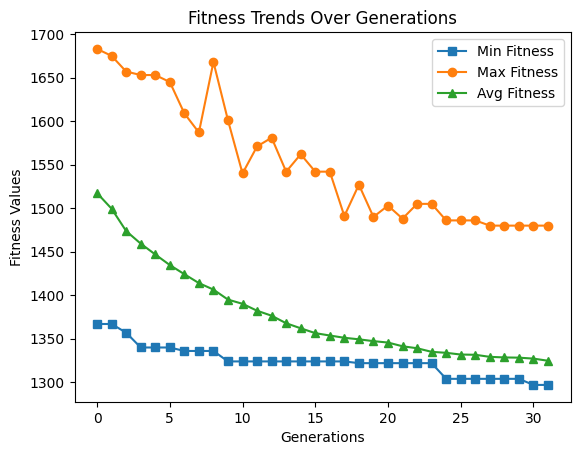

Best job order: [20 10  2 12 18 14  7  9  8  5  1 11  4 15  3  6 19 17 16 13]
Makespan of the best job order found: 1297


In [83]:

best_solution, fitness = genetic_algorithm(pop_size, num_generations)
end_time = time.time()
total_time = end_time - start_time
print(f"Total time to run all cells: {total_time:.2f} seconds")
max_fitness = []
min_fitness = []
average_fitness = []
for i in range(num_generations):
    max_fitness.append(max(fitness[i]))
    min_fitness.append(min(fitness[i]))
    average_fitness.append(average(fitness[i]))
    print(i, len(fitness[i]))
# Create x-axis values (generation numbers)
generations = range(num_generations)

# Plot the data
plt.plot(generations, min_fitness, label='Min Fitness', marker='s')
plt.plot(generations, max_fitness, label='Max Fitness', marker='o')
plt.plot(generations, average_fitness, label='Avg Fitness', marker='^')
# Add labels and title
plt.xlabel('Generations')
plt.ylabel('Fitness Values')
plt.title('Fitness Trends Over Generations')
plt.legend()
# Show the plot
plt.show()
# Plot the data

job_order=np.argmax(best_solution, 0)
for i in range(len(job_order)):
    job_order[i] += 1
print(f"Best job order: {job_order}")
print(f"Makespan of the best job order found: {evaluate_fitness(best_solution)}")

In [84]:
# Record the end time
end_time = time.time()
total_time = end_time - start_time
print(f"Total time to run all cells: {total_time:.2f} seconds")

Total time to run all cells: 11.66 seconds


[[14 73 63 39  8]
 [77 14 47 40 87]
 [32 21 26 54 58]
 [68  5 77 51 68]
 [36 70 45 91 35]
 [15 11 49 31 20]
 [12 47 63 56 47]
 [71 99 15 68 85]
 [76  3  7 85 86]
 [54 79 16 66 58]
 [77 56 89 78 53]
 [38 60 23 59 41]
 [27  5 57 49 69]
 [53 99 60 13 53]
 [29 75 41 41 49]
 [87 86 75 77 18]
 [91 61  1  9 72]
 [83  3 89 58 56]
 [87 56 64 85 13]
 [94 77 40 31 28]]
14
[0, 14, 87, 150, 189, 14, 91, 150, 197, 237, 91, 123, 197, 237, 324, 123, 191, 223, 300, 382, 191, 227, 300, 351, 450, 227, 297, 345, 442, 485, 242, 308, 394, 473, 529, 254, 355, 457, 529, 597, 325, 454, 472, 597, 682, 401, 457, 536, 682, 768, 455, 536, 592, 748, 826, 532, 592, 681, 826, 885, 570, 652, 704, 885, 934, 597, 657, 761, 934, 1003, 650, 756, 831, 947, 1056, 679, 831, 917, 992, 1105, 766, 917, 992, 1069, 1123, 857, 978, 993, 1082, 1195, 940, 1027, 1083, 1147, 1251, 1027, 1121, 1198, 1238, 1269]
total makespan is 1297


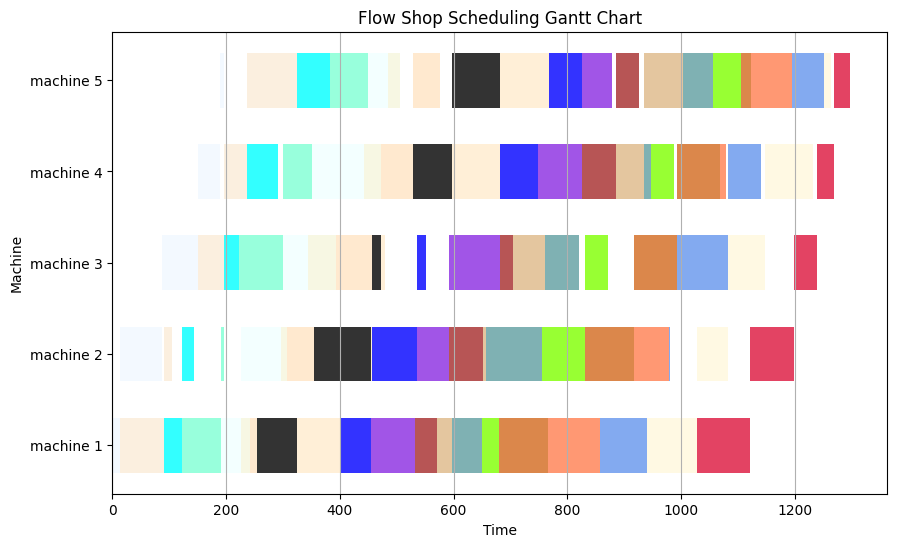

In [85]:
def gantt_plotting(sorted_processing_times):
    color_palette = ['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black',
                     'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse',
                     'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan',
                     'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen',
                     'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue',
                     'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue',
                     'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia',
                     'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew',
                     'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen',
                     'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray',
                     'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lightseagreen', 'lightskyblue',
                     'lightslategray', 'lightslategrey', 'lightsteelblue', 'lightyellow', 'lime', 'limegreen', 'linen',
                     'magenta', 'maroon', 'mediumaquamarine', 'mediumblue', 'mediumorchid', 'mediumpurple',
                     'mediumseagreen', 'mediumslateblue', 'mediumspringgreen', 'mediumturquoise', 'mediumvioletred',
                     'midnightblue', 'mintcream', 'mistyrose', 'moccasin', 'navajowhite', 'navy', 'oldlace', 'olive',
                     'olivedrab', 'orange', 'orangered', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise',
                     'palevioletred', 'papayawhip', 'peachpuff', 'peru', 'pink', 'plum', 'powderblue', 'purple',
                     'rebeccapurple', 'red', 'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown',
                     'seagreen', 'seashell', 'sienna', 'silver', 'skyblue', 'slateblue', 'slategray', 'slategrey',
                     'snow', 'springgreen', 'steelblue', 'tan', 'teal', 'thistle', 'tomato', 'turquoise', 'violet',
                     'wheat', 'white', 'whitesmoke', 'yellow', 'yellowgreen']
    machine_names = []
    durations = []
    colors = []
    for i in range(num_jobs):
        for k in range(num_machines):
            machine_names.append(f'machine {k+1}')
            durations.append(sorted_processing_times[i][k])
            if 0 <= i < 148:
                colors.append(color_palette[i])
            elif 148 <= i < 296:
                colors.append(color_palette[i-148])
            elif 296 <= i < 296+148:
                colors.append(color_palette[i-296])
            elif 296+148 <= i < 296+296:
                colors.append(color_palette[i-148-296])
    
    start_times = []
    helper_2 = 0
    dict_end_times={}
    counter=0
    print(sorted_processing_times)
    print(sorted_processing_times[0][0])
    for k in range(num_jobs):
        helper_1=0
        for i in range(num_machines):
            if k != 0 and i == 0:
                helper_2 += sorted_processing_times[k-1][0]
            if i != 0:
                helper_1 += sorted_processing_times[k][i-1]
            helper = helper_1 + helper_2
            dict_end_times[f"M_{i + 1}_S_{k + 1}"] = helper+sorted_processing_times[k][i]
            if i != 0 and k != 0:
                if dict_end_times[f"M_{i+1}_S_{k}"] > helper:
                    wait_time = dict_end_times[f"M_{i + 1}_S_{k}"]-helper
                    dict_end_times[f"M_{i + 1}_S_{k + 1}"] += wait_time
                    helper += wait_time
                if dict_end_times[f"M_{i}_S_{k+1}"] > helper:
                    idle_time = dict_end_times[f"M_{i}_S_{k+1}"]-helper
                    dict_end_times[f"M_{i+1}_S_{k + 1}"] += idle_time
                    helper += idle_time
            start_times.append(helper)
            counter += 1
    print(start_times)
    last_value = list(dict_end_times.values())[-1]      
    print(f'total makespan is {last_value}')
    # Create a Gantt chart
    plt.figure(figsize=(10, 6))

    # Plot bars for each job
    for i, machine_name in enumerate(machine_names):
        plt.barh(machine_name, durations[i], left=start_times[i], height=0.6, color=colors[i], alpha=0.8)

    plt.xlabel('Time')
    plt.ylabel('Machine')
    plt.title('Flow Shop Scheduling Gantt Chart')
    plt.grid(axis='x')
    plt.show()



sorted_processing_times_help=np.dot(proc_times, best_solution)
sorted_processing_times=np.rot90(sorted_processing_times_help, k=1)
gantt_plotting(sorted_processing_times)